In [1]:
[[0.0, 0.0, 0.0021486544219887385, 0.1370116689240653, 0.0, 0.0050158051091101, 0.004428512162521687, 0.2113771736104686, 0.191643848551793, 0.14043026724969404, 0.0, 0.0], 
 [0.6917527807327443, 0.0, 0.6358889127026911, 0.8660573985669329, 0.17589160185829839, 0.0050158051091101, 0.7495631920447174, 0.9415679801700367, 0.3641110872973089, 0.369126892406419, 0.0, 0.0010520557474284458], 
 [0.3473396591338125, 0.0, 0.0, 0.3641110872973089, 0.3641110872973089, 0.0, 0.3641110872973089, 0.3641110872973089, 0.3641110872973089, 0.3641110872973089, 0.0, 0.0], 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
 [0.6338005490720071, 0.0, 0.6358889127026911, 0.6557317203366017, 0.0, 0.0050158051091101, 0.6358889127026911, 0.7272383524849144, 0.17560461747468273, 0.025418338530558974, 0.001461802686369851, 0.0041479992650155385], 
 [0.6612838205082762, 0.2471473880917416, 0.630873107593581, 0.9949841948908899, 0.14542264163383029, 0.0, 0.7140784267111392, 0.9949841948908899, 0.7600786265900918, 0.3641110872973089, 0.1490844617703027, 0.0], 
 [0.0, 0.0, 0.0, 0.08206013015018257, 0.0, 0.0, 0.0, 0.15356676229849542, 0.13884924234892992, 0.08261985593772087, 0.0, 0.0], 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
 [0.630873107593581, 0.0, 0.6358889127026911, 0.3531261600685826, 0.0, 0.0050158051091101, 0.6358889127026911, 0.4286367416716866, 0.0, 0.0050158051091101, 0.0, 0.0005297000892633427], 
 [0.630873107593581, 0.0, 0.630873107593581, 0.630873107593581, 0.0, 0.0, 0.630873107593581, 0.630873107593581, 0.0, 0.0, 0.0, 0.0], 
 [0.6786857814549799, 0.0, 0.634487400807626, 0.9627270911423376, 0.16282460258053405, 0.0050158051091101, 0.7364961927669531, 1.0, 0.3641110872973089, 0.369126892406419, 0.0, 0.0], 
 [0.9391884144533378, 0.0, 0.6318012042289803, 0.9959205696753202, 0.3641110872973089, 0.0050158051091101, 0.995190975032133, 0.9989596879650066, 0.3641110872973089, 0.36792518779094574, 0.0, 0.0]]

[[0.0,
  0.0,
  0.0021486544219887385,
  0.1370116689240653,
  0.0,
  0.0050158051091101,
  0.004428512162521687,
  0.2113771736104686,
  0.191643848551793,
  0.14043026724969404,
  0.0,
  0.0],
 [0.6917527807327443,
  0.0,
  0.6358889127026911,
  0.8660573985669329,
  0.17589160185829839,
  0.0050158051091101,
  0.7495631920447174,
  0.9415679801700367,
  0.3641110872973089,
  0.369126892406419,
  0.0,
  0.0010520557474284458],
 [0.3473396591338125,
  0.0,
  0.0,
  0.3641110872973089,
  0.3641110872973089,
  0.0,
  0.3641110872973089,
  0.3641110872973089,
  0.3641110872973089,
  0.3641110872973089,
  0.0,
  0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.6338005490720071,
  0.0,
  0.6358889127026911,
  0.6557317203366017,
  0.0,
  0.0050158051091101,
  0.6358889127026911,
  0.7272383524849144,
  0.17560461747468273,
  0.025418338530558974,
  0.001461802686369851,
  0.0041479992650155385],
 [0.6612838205082762,
  0.2471473880917416,
  0.630873107593581,
  0.99

In [2]:
import numpy as np
import pandas as pd
import os
import random

from mcda.outranking.electre import Electre3
from mcda.outranking.promethee import Promethee2, Promethee1
from mcda.functions import UShapeFunction, VShapeFunction, LevelFunction, GaussianFunction
from mcda import *
from mcda.matrices import *
from mcda.relations import *
from mcda.scales import *
from mcda.values import CommensurableValues

In [3]:
from helper_functions import dict_to_matrix, dict_to_matrix_with_prefix, net_flow_score, net_flow_score_pos_neg, create_preference_matrix, outranking_ranking, resolve_matrix_preferences, visualize_outranking
import json

In [4]:
data = pd.read_csv('./data/criteria_3/alternatives_12/level_high/cutoff_0.5/data_95.csv')

In [5]:
file_path = './data/criteria_3/alternatives_12/level_high/cutoff_0.5/data_95.csv'
weights_file = file_path.replace(".csv", "_weights.csv")

data = pd.read_csv(file_path)

weights_data = pd.read_csv(weights_file)

performances = data.values
weights = weights_data["Weight"].values
alt_len = len(performances)
crit_len = len(weights)

optimization = weights_data["Optimization"].values.tolist()
#lambda_value = weights_data["Lambda"][0]  # Lambda is the same for all criteria
q_vals = weights_data["Q"].values
p_vals = weights_data["P"].values
v_vals = weights_data["V"].values
cutoff = weights_data["cutoff"][0]

# Get directory structure

scales = {}
preference_func_list = {}
W = {}
I = {}
P = {}
V = {}
for i in range(crit_len):
    scales[i] = QuantitativeScale(0, 1, preference_direction= ( MAX if optimization[i] == 'max' else MIN))
    W[i] = weights[i]
    I[i] = q_vals[i]
    P[i] = p_vals[i]
    V[i] = v_vals[i]
    preference_func_list[i] = VShapeFunction(p=p_vals[i], q=q_vals[i])

dataset = PerformanceTable(performances, 
                            alternatives=[str(i) for i in range(alt_len)],
                            scales=scales)

promethee1 = Promethee1(dataset, W, preference_func_list)
promethee2 = Promethee2(dataset, W, preference_func_list)
electre3 = Electre3(performance_table=dataset, 
                    criteria_weights=W, 
                    indifference_thresholds=I, 
                    preference_thresholds=P, 
                    veto_thresholds=V)

promethee_matrix = promethee1.preferences(promethee1.partial_preferences()).data
electre_matrix = electre3.construct().data
electre_binary_matrix = (electre_matrix >= cutoff).astype(int)

promethee1_rank = promethee1.rank().outranking_matrix.data.values
promethee2_rank = PreferenceStructure().from_ranking(promethee2.rank()).outranking_matrix.data.values
electre3_rank_nfs =  (electre_binary_matrix.values)
electre3_rank_nfs_pos_neg = create_preference_matrix(net_flow_score_pos_neg(electre_binary_matrix.values))

descending_distillate = electre3.distillation(
    electre3.credibility(),
)
ascending_distillate = electre3.distillation(
    electre3.credibility(),
    ascending=True
)       

# Electre 3 median ranking
electre3_median_rank = resolve_matrix_preferences(electre3.rank().data.values,outranking_ranking(descending_distillate.data.values), outranking_ranking(ascending_distillate.data.values))

electre3_final_ranking = electre3.rank().data.values


results = {}
results['promethee_matrix'] = promethee_matrix.values.tolist()
results['electre_matrix'] = electre_matrix.values.tolist()
results['electre_binary_matrix'] = electre_binary_matrix.values.tolist()
results['promethee1_rank'] = promethee1_rank.tolist()
results['promethee2_rank'] = promethee2_rank.tolist()
results['electre3_rank_nfs'] = electre3_rank_nfs.tolist()
results['electre3_rank_nfs_pos_neg'] = electre3_rank_nfs_pos_neg.tolist()
results['electre3_median_rank'] = electre3_median_rank.tolist()
results['electre3_final_ranking'] = electre3_final_ranking.tolist()

In [6]:
from hassediagram import plot_hasse
labels = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12"]

In [7]:
promethee2_rank

array([[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]])

In [8]:
indifference_num = np.sum(np.logical_and(promethee2_rank.T, promethee2_rank), axis=0) - np.diag(promethee2_rank)
indifference_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
weak = np.sum(promethee2_rank, axis=0) - np.diag(promethee2_rank);weak

array([ 8,  3,  2,  0,  7, 10,  4,  1,  9, 11,  6,  5])

In [10]:
outranked_variants_1 = weak - indifference_num;outranked_variants_1

array([ 8,  3,  2,  0,  7, 10,  4,  1,  9, 11,  6,  5])

In [19]:
res_prom= dict_to_matrix(new_promethee_partial['solution_r']).astype(int)

In [20]:
indifference_num = np.sum(np.logical_and(res_prom.T, res_prom), axis=0) - np.diag(res_prom)
indifference_num

array([4, 6, 4, 4, 6, 6, 4, 4, 6, 6, 6, 6])

In [21]:
np.diag(res_prom)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
weak = np.sum(res_prom, axis=0) - np.diag(res_prom);weak

array([11,  6, 11, 11,  6,  6, 11, 11,  6,  6,  6,  6])

In [23]:
outranked_variants_2 = weak - indifference_num;outranked_variants_2

array([7, 0, 7, 7, 0, 0, 7, 7, 0, 0, 0, 0])

In [24]:
rank_diff = np.abs(outranked_variants_1 - outranked_variants_2);rank_diff

array([ 1,  3,  5,  7,  7, 10,  3,  6,  9, 11,  6,  5])

In [27]:
def __max_rank_diff(size: int):
        if size % 2 == 0:
            return (size // 2) * size
        else:
            return -(size // -2) * (size - 1)

In [28]:
__max_rank_diff(12)

72

In [29]:
#plot_hasse(promethee2_rank, labels)

In [30]:
from new_methods.promethee_complete import promethee_complete
from new_methods.promethee_partial import promethee_partial

In [31]:
new_promethee_partial = promethee_partial(promethee_matrix.values)
new_promethee_complete = promethee_complete(promethee_matrix.values)

c:\Users\Jurek\Desktop\Doktorat\nowe_repo\new_methods\promethee_partial.py:62: DeprecationWarning: Model.display() is deprecated
  m.display()
c:\Users\Jurek\Desktop\Doktorat\nowe_repo\new_methods\promethee_complete.py:46: DeprecationWarning: Model.display() is deprecated
  m.display()


In [32]:
from metrics import rank_difference_measure

In [33]:
dict_to_matrix(new_promethee_partial['solution_r']).astype(int)

array([[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [34]:
promethee2_rank

array([[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]])

In [35]:
rank_difference_measure(dict_to_matrix(new_promethee_partial['solution_r']).astype(int), promethee2_rank)

np.float64(-0.01388888888888884)

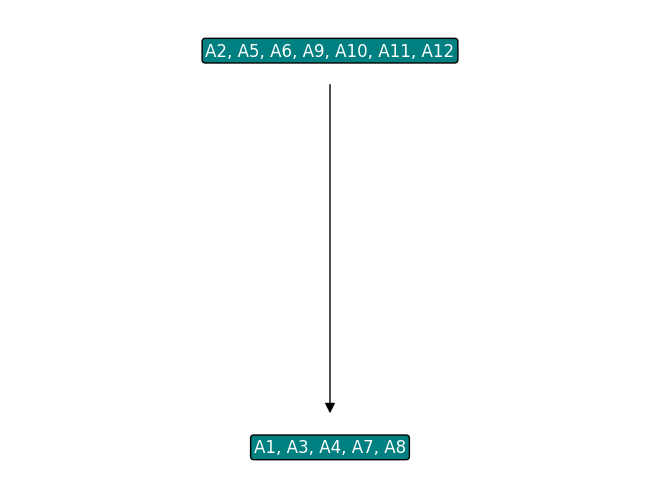

In [36]:
plot_hasse(dict_to_matrix(new_promethee_partial['solution_r']).astype(int), labels)